## check for significance in epineural and penetrating threshold and dynamic range 


In [402]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import normaltest
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn, posthoc_conover
plt.rcParams['svg.fonttype'] = 'none'

epineuralDF = pd.read_csv("epineural\\selectiveDF.csv")
epineuralDF.loc[epineuralDF['binarySearchRes']==0.4,'binarySearchRes'] = 0.41
epiTH = epineuralDF['Threshold (nC)']
epiDR = epineuralDF['Dynamic Range (nC)']


penetratingDF = pd.read_csv("penetrating\\selectiveDF.csv")
penTH = penetratingDF['Threshold (nC)']
penDR = penetratingDF['Dynamic Range (nC)']

In [403]:
allData = epineuralDF.append(penetratingDF,ignore_index=False)
allBinaryRes = sorted(allData['binarySearchRes'].unique())

In [404]:
print 'Epineural'
print epiTH.median(), epiDR.median()
# print epineuralDF['Threshold (nC)'].mean(), penetratingDF['Threshold (nC)'].mean()
# print epineuralDF['Threshold (nC)'].median()/penetratingDF['Threshold (nC)'].median()

print 'Penetrating'
print penTH.median(), penDR.median()


Epineural
9.677 1.018
Penetrating
0.911 0.359


Text(0.5,1,'Penetrating thresholds')

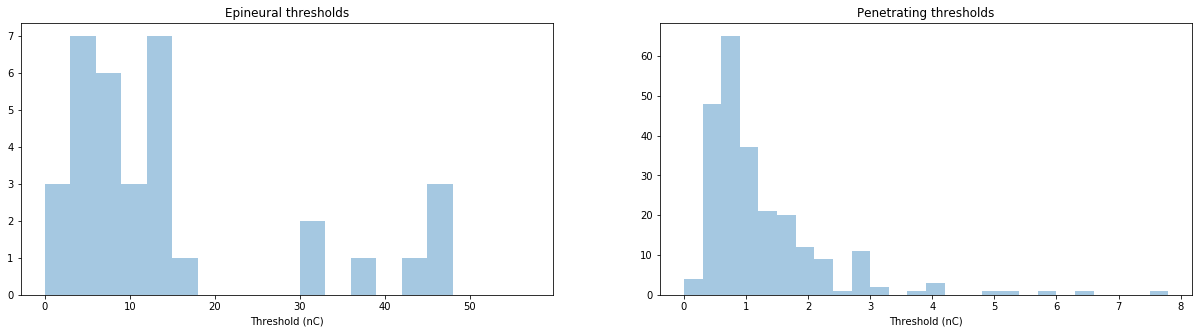

In [405]:
f,ax = plt.subplots(1,2,figsize=(21,5))
binSize = np.arange(0, max(epiTH), 3)
sns.distplot(epiTH,bins = binSize,kde = False,ax=ax[0])
ax[0].set_title('Epineural thresholds')

binSize = np.arange(0, max(penTH), 0.3)
sns.distplot(penTH,bins = binSize,kde = False,ax=ax[1])
ax[1].set_title('Penetrating thresholds')

In [406]:
# threshold normality
alpha = 0.01
k, p1 = normaltest(penTH) # len(penTH)

if p1 < alpha:  # null hypothesis: x comes from a normal distribution
    print("penTH does not come from a normal distribution")
else:
    print("penTH may be normal")

k, p2 = normaltest(epiTH) # len(epiTH)

if p2 < alpha:  # null hypothesis: x comes from a normal distribution
    print("epiTH does not come from a normal distribution")
else:
    print("epiTH may be normal")


penTH does not come from a normal distribution
epiTH does not come from a normal distribution


In [407]:
# dynamic range normality'
k, p3 = normaltest(penTH) # len(penTH)

if p3 < alpha:  # null hypothesis: x comes from a normal distribution
    print("penDR does not come from a normal distribution")
else:
    print("penDR may be normal")

k, p4 = normaltest(epiTH) # len(epiTH)

if p4 < alpha:  # null hypothesis: x comes from a normal distribution
    print("epiDR does not come from a normal distribution")
else:
    print("epiDR may be normal")


penDR does not come from a normal distribution
epiDR does not come from a normal distribution


# 1) P v/s E for threshold

In [408]:
k, p5 = kruskal(penTH, epiTH)
if p5 < alpha:
    print("The difference between penTH and epiTH is statistically significant")
else:
    print("not significant")

The difference between penTH and epiTH is statistically significant


# 2) P v/s E for DR

In [409]:
# DR significance:

k, p6 = kruskal(penDR, epiDR)
if p6 < alpha:
    print("The difference between penDR and epiDR is statistically significant")
else:
    print("not significant")

The difference between penDR and epiDR is statistically significant


# plot TH and DR per binary search res

(-2, 10.5)

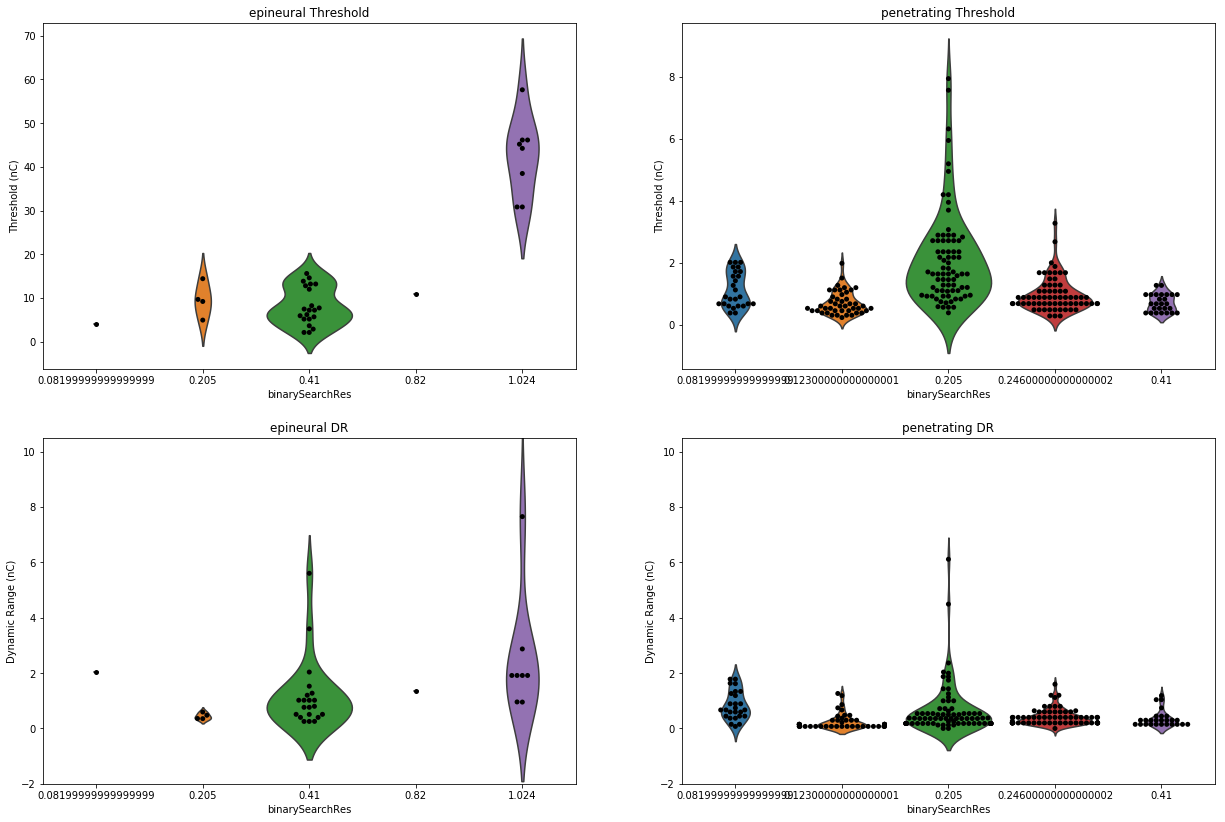

In [463]:
f,ax=plt.subplots(2,2,figsize=(21,14))

sns.violinplot(y='Threshold (nC)', x = 'binarySearchRes', data = epineuralDF,ax=ax[0][0], inner=None, scale='count')
sns.swarmplot(y='Threshold (nC)', x = 'binarySearchRes', data = epineuralDF,ax=ax[0][0], color='k')
ax[0][0].set_title('epineural Threshold')
# ax[0][0].set_ylim([-2,70])

sns.violinplot(y='Threshold (nC)', x = 'binarySearchRes', data = penetratingDF,ax=ax[0][1], inner=None,  scale='count')
sns.swarmplot(y='Threshold (nC)', x = 'binarySearchRes', data = penetratingDF,ax=ax[0][1], color='k')
ax[0][1].set_title('penetrating Threshold')
# ax[0][1].set_ylim([-2,70])

sns.violinplot(y='Dynamic Range (nC)', x = 'binarySearchRes', data = epineuralDF,ax=ax[1][0], inner=None,  scale='count')
sns.swarmplot(y='Dynamic Range (nC)', x = 'binarySearchRes', data = epineuralDF,ax=ax[1][0], color='k')
ax[1][0].set_title('epineural DR')
ax[1][0].set_ylim([-2,10.5])

sns.violinplot(y='Dynamic Range (nC)', x = 'binarySearchRes', data = penetratingDF,ax=ax[1][1], inner=None,  scale='count')
sns.swarmplot(y='Dynamic Range (nC)', x = 'binarySearchRes', data = penetratingDF,ax=ax[1][1], color='k')
ax[1][1].set_title('penetrating DR')
ax[1][1].set_ylim([-2,10.5])

# f.savefig('DR_TH_perRes.svg')

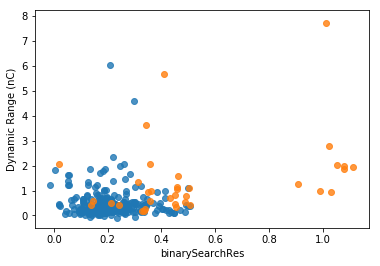

In [442]:
sns.regplot(x='binarySearchRes',y='Dynamic Range (nC)',data=penetratingDF,fit_reg=False,x_jitter = 0.1, y_jitter = 0.1)
sns.regplot(x='binarySearchRes',y='Dynamic Range (nC)',data=epineuralDF,fit_reg=False,x_jitter = 0.1, y_jitter = 0.1)

# 3) P v/s E for threshold for each res. 
groups: (Pth,res1), (Pth, res2),..., (Eth, res1), (Eth, res2),...

In [411]:
allBinaryRes_P = penetratingDF['binarySearchRes'].unique()
validRes_P = []

for iRes in allBinaryRes_P:
    print 'resolution: %.02f' %iRes
    THseries = penetratingDF[penetratingDF['binarySearchRes']==iRes]['Threshold (nC)']
    if len(THseries) > 8:
        validRes_P.append(iRes)
        k, p7 = normaltest(THseries)
        if p7 < alpha:  # null hypothesis: x comes from a normal distribution
            print("penTH does not come from a normal distribution")
        else:
            print("penTH may be normal")
    else:
        print('not enough samples')
        
print validRes_P
print ''

allBinaryRes_E = epineuralDF['binarySearchRes'].unique()
validRes_E = []

for iRes in allBinaryRes_E:
    print 'resolution: %.02f' %iRes
    THseries = epineuralDF[epineuralDF['binarySearchRes']==iRes]['Threshold (nC)']
    if len(THseries) > 8:
        validRes_E.append(iRes)
        k, p7 = normaltest(THseries)
        if p7 < alpha:  # null hypothesis: x comes from a normal distribution
            print("epiDR does not come from a normal distribution")
        else:
            print("epiTH may be normal")
    else:
        print('not enough samples')

print validRes_E        


resolution: 0.08
penTH does not come from a normal distribution
resolution: 0.25
penTH does not come from a normal distribution
resolution: 0.20
penTH does not come from a normal distribution
resolution: 0.12
penTH does not come from a normal distribution
resolution: 0.41
penTH may be normal
[0.08199999999999999, 0.24600000000000002, 0.205, 0.12300000000000001, 0.41]

resolution: 0.82
not enough samples
resolution: 0.08
not enough samples
resolution: 0.41
epiTH may be normal
resolution: 1.02
not enough samples
resolution: 0.20
not enough samples
[0.41]


In [416]:
TH_res_groups = [group["Threshold (nC)"].values for name, group in epineuralDF.groupby('binarySearchRes')]+[group["Threshold (nC)"].values for name, group in penetratingDF.groupby('binarySearchRes')]
print ['epi_%0.03f' %name for name, group in epineuralDF.groupby('binarySearchRes')]+['pen_%0.03f' %name for name, group in penetratingDF.groupby('binarySearchRes')]

k1,p1 = kruskal(*TH_res_groups)
print p1
posthoc_dunn(TH_res_groups) < 0.01


['epi_0.082', 'epi_0.205', 'epi_0.410', 'epi_0.820', 'epi_1.024', 'pen_0.082', 'pen_0.123', 'pen_0.205', 'pen_0.246', 'pen_0.410']
5.212737265604444e-28


,1,2,3,4,5,6,7,8,9,10
1,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,True,False,True,True
3,False,False,True,False,False,True,True,True,True,True
4,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,True,True,True,True,True,True
6,False,True,True,False,True,True,False,True,False,False
7,False,True,True,False,True,False,True,True,False,False
8,False,False,True,False,True,True,True,True,True,True
9,False,True,True,False,True,False,False,True,True,False
10,False,True,True,False,True,False,False,True,False,True


# 4) P v/s E for dynamic range for each res. 
groups: (Pdr,res1), (Pdr, res2),..., (Edr, res1), (Edr, res2),...

In [388]:
allBinaryRes_P = penetratingDF['binarySearchRes'].unique()
validRes_P = []

for iRes in allBinaryRes_P:
    print 'resolution: %.02f' %iRes
    DRseries = penetratingDF[penetratingDF['binarySearchRes']==iRes]['Dynamic Range (nC)']
    if len(DRseries) > 8:
        validRes_P.append(iRes)
        k, p7 = normaltest(DRseries)
        if p7 < alpha:  # null hypothesis: x comes from a normal distribution
            print("penDR does not come from a normal distribution")
        else:
            print("penDR may be normal")
    else:
        print('not enough samples')
        
print validRes_P
print ''

allBinaryRes_E = epineuralDF['binarySearchRes'].unique()
validRes_E = []

for iRes in allBinaryRes_E:
    print 'resolution: %.02f' %iRes
    DRseries = epineuralDF[epineuralDF['binarySearchRes']==iRes]['Dynamic Range (nC)']
    if len(DRseries) > 8:
        validRes_E.append(iRes)
        k, p7 = normaltest(DRseries)
        if p7 < alpha:  # null hypothesis: x comes from a normal distribution
            print("penDR does not come from a normal distribution")
        else:
            print("penDR may be normal")
    else:
        print('not enough samples')

print validRes_E        


resolution: 0.08
penDR may be normal
resolution: 0.25
penDR does not come from a normal distribution
resolution: 0.20
penDR does not come from a normal distribution
resolution: 0.12
penDR does not come from a normal distribution
resolution: 0.41
penDR does not come from a normal distribution
[0.08199999999999999, 0.24600000000000002, 0.205, 0.12300000000000001, 0.41]

resolution: 0.82
not enough samples
resolution: 0.08
not enough samples
resolution: 0.41
penDR does not come from a normal distribution
resolution: 1.02
not enough samples
resolution: 0.40
not enough samples
resolution: 0.20
not enough samples
[0.41]


In [414]:
TH_res_groups = [group["Dynamic Range (nC)"].values for name, group in epineuralDF.groupby('binarySearchRes')]+[group["Dynamic Range (nC)"].values for name, group in penetratingDF.groupby('binarySearchRes')]
print ['epi_%0.03f' %name for name, group in epineuralDF.groupby('binarySearchRes')]+['pen_%0.03f' %name for name, group in penetratingDF.groupby('binarySearchRes')]

k1,p1 = kruskal(*TH_res_groups)
print p1
posthoc_dunn(TH_res_groups) < 0.01

['epi_0.082', 'epi_0.205', 'epi_0.410', 'epi_0.820', 'epi_1.024', 'pen_0.082', 'pen_0.123', 'pen_0.205', 'pen_0.246', 'pen_0.410']
1.7501282292957347e-14


,1,2,3,4,5,6,7,8,9,10
1,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,True,True,True
4,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,True,False,True,True,True,True
6,False,False,False,False,False,True,True,True,True,True
7,False,False,True,False,True,True,True,True,True,False
8,False,False,True,False,True,True,True,True,False,False
9,False,False,True,False,True,True,True,False,True,False
10,False,False,True,False,True,True,False,False,False,True


# KW test for DR and TH at each res. 
groups: (res1), (res2), (res3),...

## 5) TH test

In [390]:
validRes_TH = []
for iRes in allBinaryRes:
    print 'resolution: %.02f' %iRes
    THseries = allData[allData['binarySearchRes']==iRes]['Threshold (nC)']
    if len(THseries) > 8:
        validRes_TH.append(iRes)
        k, p7 = normaltest(THseries)
        if p7 < alpha:  # null hypothesis: x comes from a normal distribution
            print("TH does not come from a normal distribution")
        else:
            print("TH may be normal")
    else:
        print('not enough samples')
        
print validRes_TH

resolution: 0.08
TH does not come from a normal distribution
resolution: 0.12
TH does not come from a normal distribution
resolution: 0.20
TH does not come from a normal distribution
resolution: 0.25
TH does not come from a normal distribution
resolution: 0.40
not enough samples
resolution: 0.41
TH does not come from a normal distribution
resolution: 0.82
not enough samples
resolution: 1.02
not enough samples
[0.08199999999999999, 0.12300000000000001, 0.205, 0.24600000000000002, 0.41]


In [391]:
# across groups
kruskal(*[group["Threshold (nC)"].values for name, group in allData.groupby('binarySearchRes')])

posthoc_dunn(allData, val_col = 'Threshold (nC)', group_col = 'binarySearchRes') < 0.01

,0.082,0.123,0.205,0.246,0.4,0.41,0.82,1.024
0.082,True,True,True,False,True,False,False,True
0.123,True,True,True,False,True,True,False,True
0.205,True,True,True,True,False,True,False,True
0.246,False,False,True,True,True,False,False,True
0.400,True,True,False,True,True,True,False,False
0.410,False,True,True,False,True,True,False,True
0.820,False,False,False,False,False,False,True,False
1.024,True,True,True,True,False,True,False,True


Text(0.5,1,'thresholds')

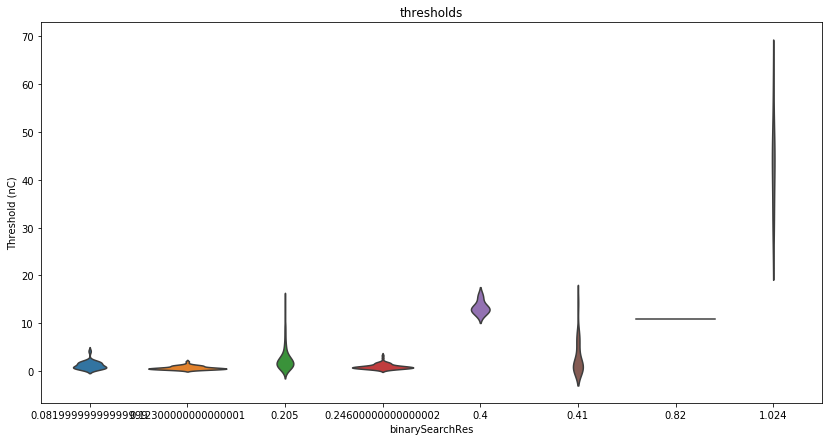

In [392]:
f,ax=plt.subplots(figsize=(14,7))
sns.violinplot(y='Threshold (nC)', x = 'binarySearchRes', data = allData, inner=None)
ax.set_title('thresholds')
# sns.swarmplot(y='Threshold (nC)', x = 'binarySearchRes', data = allData, color='k')
# plt.savefig('allData_TH.svg')

## 6) DR test

In [393]:
validRes_DR = []
for iRes in allBinaryRes:
    print 'resolution: %.02f' %iRes
    DRseries = allData[allData['binarySearchRes']==iRes]['Dynamic Range (nC)']
    if len(DRseries) > 8:
        validRes_DR.append(iRes)
        k, p7 = normaltest(DRseries)
        if p7 < alpha:  # null hypothesis: x comes from a normal distribution
            print("DR does not come from a normal distribution")
        else:
            print("DR may be normal")
    else:
        print('not enough samples')
        
print validRes_DR

resolution: 0.08
DR may be normal
resolution: 0.12
DR does not come from a normal distribution
resolution: 0.20
DR does not come from a normal distribution
resolution: 0.25
DR does not come from a normal distribution
resolution: 0.40
not enough samples
resolution: 0.41
DR does not come from a normal distribution
resolution: 0.82
not enough samples
resolution: 1.02
not enough samples
[0.08199999999999999, 0.12300000000000001, 0.205, 0.24600000000000002, 0.41]


In [420]:
# across groups
kruskal(*[group["Dynamic Range (nC)"].values for name, group in allData.groupby('binarySearchRes')])
posthoc_dunn(allData, val_col = "Dynamic Range (nC)", group_col = 'binarySearchRes',p_adjust = 'holm') < 0.01

# sns.heatmap(asd)

,0.082,0.123,0.205,0.246,0.41,0.82,1.024
0.082,True,True,False,False,False,False,False
0.123,True,True,True,True,True,False,True
0.205,False,True,True,False,False,False,True
0.246,False,True,False,True,False,False,True
0.410,False,True,False,False,True,False,True
0.820,False,False,False,False,False,True,False
1.024,False,True,True,True,True,False,True


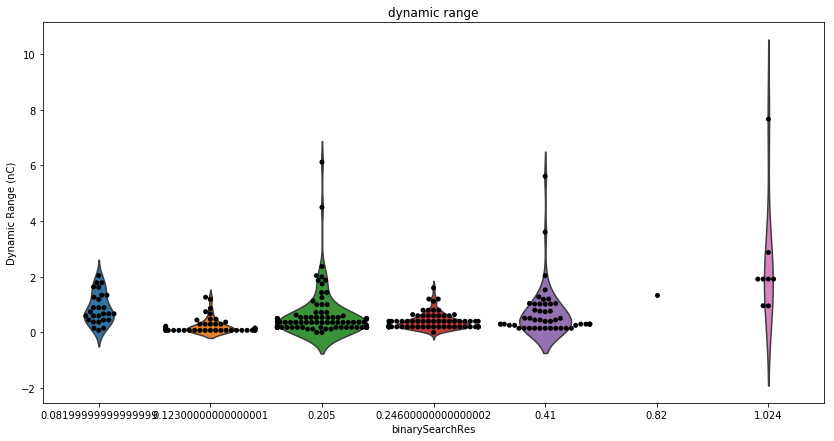

In [454]:
f,ax=plt.subplots(figsize=(14,7))
sns.violinplot(y='Dynamic Range (nC)', x = 'binarySearchRes', data = allData, inner=None,  scale='count')
ax.set_title('dynamic range')
sns.swarmplot(y='Dynamic Range (nC)', x = 'binarySearchRes', data = allData,color='k')
# plt.savefig('allData_DR.svg')

## differences in TH and DR between animals

In [467]:
kruskal(*[group["Threshold (nC)"].values for name, group in epineuralDF.groupby('subject')])
posthoc_dunn(epineuralDF, val_col = "Threshold (nC)", group_col = 'subject',p_adjust = 'holm') < 0.01


,Galactus,HA02,HA04,Hobgoblin
Galactus,True,False,False,False
HA02,False,True,False,True
HA04,False,False,True,False
Hobgoblin,False,True,False,True


In [469]:
kruskal(*[group["Threshold (nC)"].values for name, group in penetratingDF.groupby('subject')])
posthoc_dunn(penetratingDF, val_col = "Threshold (nC)", group_col = 'subject',p_adjust = 'holm') < 0.01


,Electro,Freeze,Galactus,Hobgoblin
Electro,True,False,True,True
Freeze,False,True,True,True
Galactus,True,True,True,False
Hobgoblin,True,True,False,True


In [468]:
# across animals
kruskal(*[group["Dynamic Range (nC)"].values for name, group in epineuralDF.groupby('subject')])
posthoc_dunn(epineuralDF, val_col = "Dynamic Range (nC)", group_col = 'subject',p_adjust = 'holm') < 0.01


,Galactus,HA02,HA04,Hobgoblin
Galactus,True,False,False,False
HA02,False,True,False,False
HA04,False,False,True,False
Hobgoblin,False,False,False,True


In [470]:
kruskal(*[group["Dynamic Range (nC)"].values for name, group in penetratingDF.groupby('subject')])
posthoc_dunn(penetratingDF, val_col = "Dynamic Range (nC)", group_col = 'subject',p_adjust = 'holm') < 0.01


,Electro,Freeze,Galactus,Hobgoblin
Electro,True,True,False,False
Freeze,True,True,True,False
Galactus,False,True,True,False
Hobgoblin,False,False,False,True


In [487]:
# combined
TH_res_groups = [group["Threshold (nC)"].values for name, group in epineuralDF.groupby('subject')]+[group["Threshold (nC)"].values for name, group in penetratingDF.groupby('subject')]
print ['epi_%s' %name for name, group in epineuralDF.groupby('subject')]+['pen_%s' %name for name, group in penetratingDF.groupby('subject')]

kruskal(*TH_res_groups)
posthoc_dunn(TH_res_groups, val_col = "Threshold (nC)", group_col = 'subject',p_adjust = 'holm') < 0.01

['epi_Galactus', 'epi_HA02', 'epi_HA04', 'epi_Hobgoblin', 'pen_Electro', 'pen_Freeze', 'pen_Galactus', 'pen_Hobgoblin']


,1,2,3,4,5,6,7,8
1,True,False,False,False,False,False,True,True
2,False,True,False,False,False,False,True,True
3,False,False,True,False,False,False,True,True
4,False,False,False,True,False,False,True,True
5,False,False,False,False,True,False,True,True
6,False,False,False,False,False,True,True,True
7,True,True,True,True,True,True,True,False
8,True,True,True,True,True,True,False,True


In [476]:
# combined
TH_res_groups = [group["Dynamic Range (nC)"].values for name, group in epineuralDF.groupby('subject')]+[group["Dynamic Range (nC)"].values for name, group in penetratingDF.groupby('subject')]
print ['epi_%s' %name for name, group in epineuralDF.groupby('subject')]+['pen_%s' %name for name, group in penetratingDF.groupby('subject')]

kruskal(*TH_res_groups)
posthoc_dunn(TH_res_groups, val_col = "Dynamic Range (nC)", group_col = 'subject',p_adjust = 'holm') < 0.01

['epi_Galactus', 'epi_HA02', 'epi_HA04', 'epi_Hobgoblin', 'pen_Electro', 'pen_Freeze', 'pen_Galactus', 'pen_Hobgoblin']


,1,2,3,4,5,6,7,8
1,True,False,False,False,False,False,False,False
2,False,True,False,False,True,False,True,True
3,False,False,True,False,False,False,False,False
4,False,False,False,True,True,False,True,False
5,False,True,False,True,True,False,False,False
6,False,False,False,False,False,True,True,False
7,False,True,False,True,False,True,True,False
8,False,True,False,False,False,False,False,True


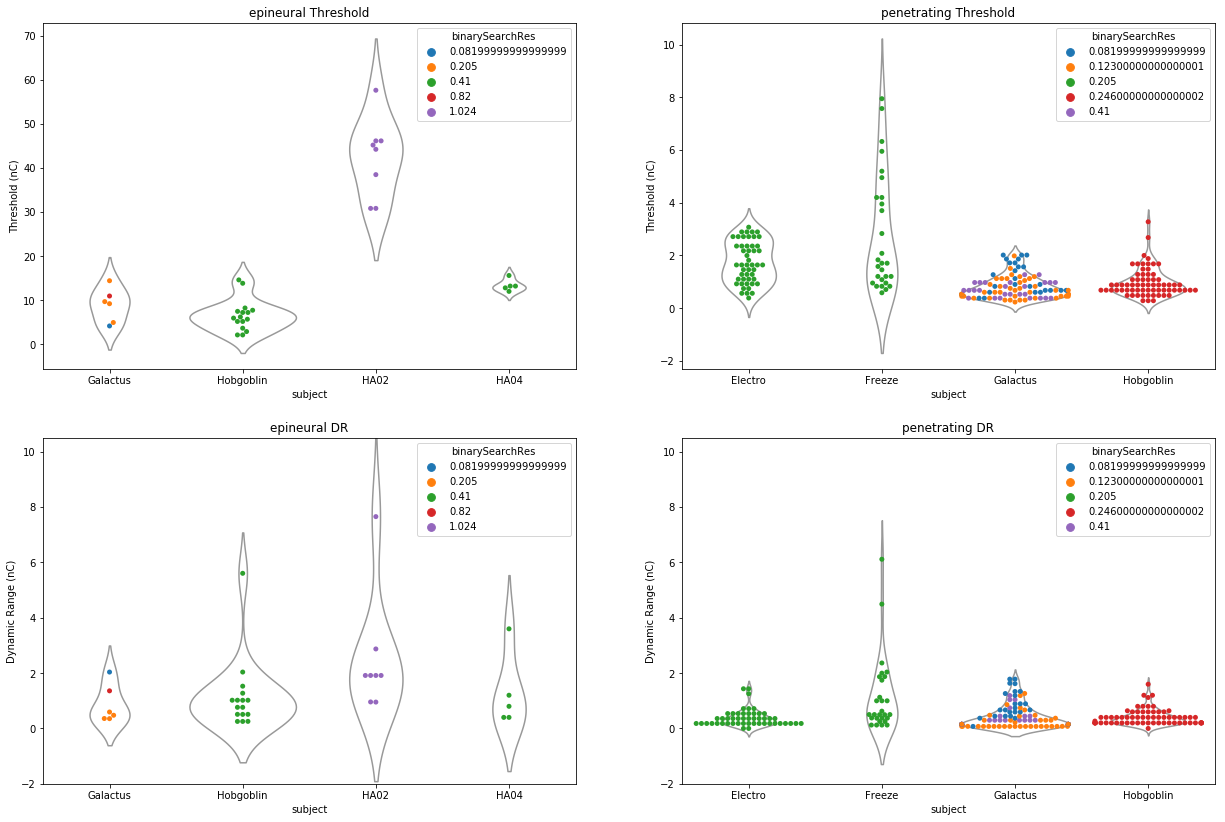

In [486]:
f,ax=plt.subplots(2,2,figsize=(21,14))

sns.violinplot(y='Threshold (nC)', x = 'subject', data = epineuralDF,ax=ax[0][0], inner=None, scale='count',color='w',order=['Galactus','Hobgoblin','HA02','HA04'])
sns.swarmplot(y='Threshold (nC)', x = 'subject', data = epineuralDF,ax=ax[0][0], hue='binarySearchRes',order=['Galactus','Hobgoblin','HA02','HA04'])
ax[0][0].set_title('epineural Threshold')
# ax[0][0].set_ylim([-2,70])

sns.violinplot(y='Threshold (nC)', x = 'subject', data = penetratingDF,ax=ax[0][1], inner=None,  scale='count',color='w',order=['Electro','Freeze','Galactus','Hobgoblin'])
sns.swarmplot(y='Threshold (nC)', x = 'subject', data = penetratingDF,ax=ax[0][1], hue='binarySearchRes',order=['Electro','Freeze','Galactus','Hobgoblin'])
ax[0][1].set_title('penetrating Threshold')
# ax[0][1].set_ylim([-2,70])

sns.violinplot(y='Dynamic Range (nC)', x = 'subject', data = epineuralDF,ax=ax[1][0], inner=None,  scale='count',color='w',order=['Galactus','Hobgoblin','HA02','HA04'])
sns.swarmplot(y='Dynamic Range (nC)', x = 'subject', data = epineuralDF,ax=ax[1][0], hue='binarySearchRes',order=['Galactus','Hobgoblin','HA02','HA04'])
ax[1][0].set_title('epineural DR')
ax[1][0].set_ylim([-2,10.5])

sns.violinplot(y='Dynamic Range (nC)', x = 'subject', data = penetratingDF,ax=ax[1][1], inner=None,  scale='count',color='w',order=['Electro','Freeze','Galactus','Hobgoblin'])
sns.swarmplot(y='Dynamic Range (nC)', x = 'subject', data = penetratingDF,ax=ax[1][1], hue='binarySearchRes',order=['Electro','Freeze','Galactus','Hobgoblin'])
ax[1][1].set_title('penetrating DR')
ax[1][1].set_ylim([-2,10.5])

f.savefig('DR_TH_perSubj.svg')